# METEOROLOGICAL DATA PRESENTATION
## Numerical and Graphical Summaries

This notebook presents a comprehensive exploratory analysis of the meteorological dataset with detailed numerical and graphical summaries.


### 1. DATASET INTRODUCTION

In this section, we will study the dataset, the different categories, the size of the dataset, etc.


In [2]:
# Data loading
data_weather <- read.table("data/donnees-synop-essentielles-omm.csv",
                        header=TRUE,
                        sep=";",
                        quote = "\"") # treats text between "..." as a single field, even if it contains ;


In [3]:
# General dataset overview
head(data_weather)
dim(data_weather)
# summary(data_weather) J'enlève pour éviter d'afficher trop d'information

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


[1] 1719567      82

**Main observations:**
- Large dataset size: dataframe with 82 variables and 1,719,567 observations


In [4]:
# Display of variable labels
names_df <- data.frame(
    index = seq_along(colnames(data_weather)),
    name = colnames(data_weather)
)
print(names_df)

   index                                                      name
1      1                                            ID.OMM.station
2      2                                                      Date
3      3                                    Pression.au.niveau.mer
4      4                         Variation.de.pression.en.3.heures
5      5                             Type.de.tendance.barométrique
6      6                             Direction.du.vent.moyen.10.mn
7      7                               Vitesse.du.vent.moyen.10.mn
8      8                                               Température
9      9                                            Point.de.rosée
10    10                                                  Humidité
11    11                                    Visibilité.horizontale
12    12                                             Temps.présent
13    13                                             Temps.passé.1
14    14                                             Temps.pas

**Variable description:**
We have various variables providing a lot of information about the weather at a given station.


### 2. EXTRACTION OF SIMILAR DATA GROUPS

Extraction of data related to temperature, pressure, wind, precipitation, snow.


In [5]:
# Selection of temperature-related values (first in Kelvin, second in Celsius)
temperature_data <- data_weather[,c(1:2, 8, 25:29)] 
temperature_data_C <- data_weather[,c(1:2, 65:70)] 

# Sort by ascending date
temperature_data <- temperature_data[order(temperature_data$Date), ]
temperature_data_C <- temperature_data_C[order(temperature_data_C$Date), ]

# Reorganize the index
rownames(temperature_data) <- NULL
rownames(temperature_data_C) <- NULL
head(temperature_data)
head(temperature_data_C)


,ID.OMM.station,Date,Température,Température.minimale.sur.12.heures,Température.minimale.sur.24.heures,Température.maximale.sur.12.heures,Température.maximale.sur.24.heures,Température.minimale.du.sol.sur.12.heures
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,294.85,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,295.15,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,288.85,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,292.85,NA,NA,NA,NA,291.55
5,81415,2015-08-04T02:00:00+02:00,297.55,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,286.35,NA,NA,NA,NA,282.85


,ID.OMM.station,Date,Température...C.,Température.minimale.sur.12.heures...C.,Température.minimale.sur.24.heures...C.,Température.maximale.sur.12.heures...C.,Température.maximale.sur.24.heures...C.,Température.minimale.du.sol.sur.12.heures..en..C.
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,21.7,NA,NA,NA,NA,NA
2,7761,2015-08-04T02:00:00+02:00,22.0,NA,NA,NA,NA,NA
3,7020,2015-08-04T02:00:00+02:00,15.7,NA,NA,NA,NA,NA
4,7240,2015-08-04T02:00:00+02:00,19.7,NA,NA,NA,NA,18.4
5,81415,2015-08-04T02:00:00+02:00,24.4,NA,NA,NA,NA,NA
6,7110,2015-08-04T02:00:00+02:00,13.2,NA,NA,NA,NA,9.7


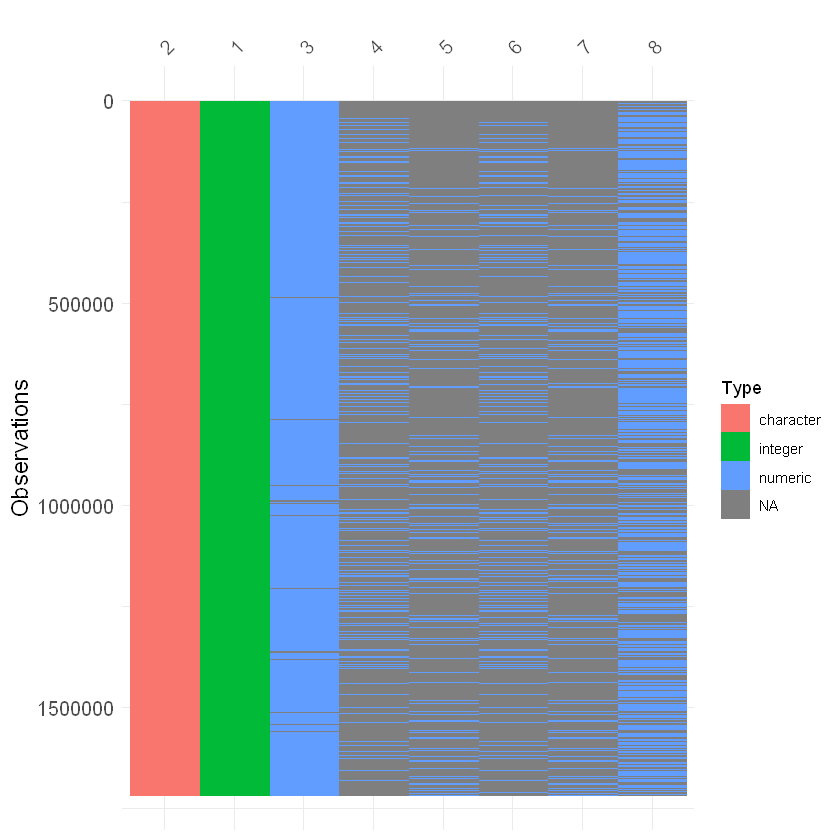

In [6]:
# Visualization of missing data for temperature variables (with column numbers)
library(visdat)
library(ggplot2)
col_numbers <- seq_along(colnames(temperature_data))
colnames(temperature_data) <- as.character(col_numbers)
vis_dat(
  temperature_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )

**Correspondence between column number and variable name for `temperature_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Température`    |
| 4             | `Température.minimale.sur.12.heures` |
| 5             | `Température.minimale.sur.24.heures` |
| 6             | `Température.maximale.sur.12.heures` |
| 7             | `Température.maximale.sur.24.heures` |


In [7]:
# Selection of pressure-related values
pressure_data <- data_weather[, c(1:5, 21:22)]

# Sort by ascending date
pressure_data <- pressure_data[order(pressure_data$Date), ]

# Reorganize the index
row.names(pressure_data) <- NULL
head(pressure_data)


,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Pression.station,Niveau.barométrique
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,101570,30,1,101430,NA
2,7761,2015-08-04T02:00:00+02:00,101600,50,0,101500,NA
3,7020,2015-08-04T02:00:00+02:00,101390,-10,7,101130,NA
4,7240,2015-08-04T02:00:00+02:00,101410,130,3,100110,NA
5,81415,2015-08-04T02:00:00+02:00,101370,270,3,100160,NA
6,7110,2015-08-04T02:00:00+02:00,101490,40,1,100350,NA


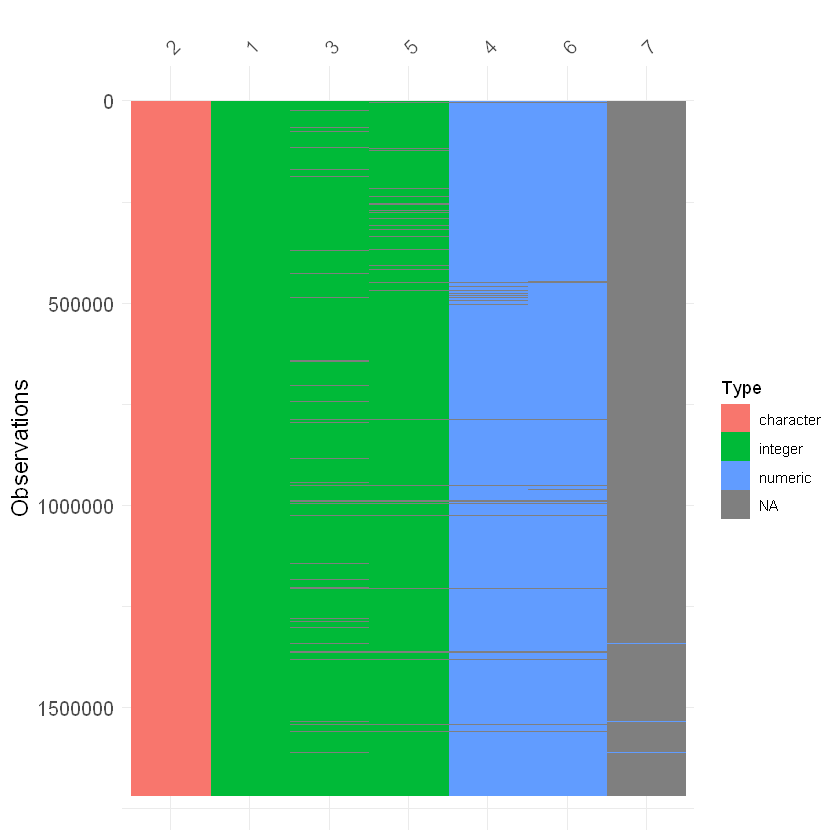

In [ ]:
# Chart to visualize missing pressure data with column numbers as labels
col_numbers <- seq_along(colnames(pressure_data))
colnames(pressure_data) <- as.character(col_numbers)
vis_dat(
  pressure_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )


**Correspondence between column number and variable name for `pressure_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Pression.au.niveau.mer` |
| 4             | `Variation.de.pression.en.3.heures` |
| 5             | `Type.de.tendance.barométrique` |
| 6             | `Pression.station` |
| 7             | `Niveau.barométrique` |


In [9]:
# Selection of precipitation-related values
precipitation_data <- data_weather[, c(1:2, 10, 39:43)]

# Sort by ascending date
precipitation_data <- precipitation_data[order(precipitation_data$Date), ]

# Reorganize the index
row.names(precipitation_data) <- NULL
head(precipitation_data)


,ID.OMM.station,Date,Humidité,Précipitations.dans.la.dernière.heure,Précipitations.dans.les.3.dernières.heures,Précipitations.dans.les.6.dernières.heures,Précipitations.dans.les.12.dernières.heures,Précipitations.dans.les.24.dernières.heures
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7790,2015-08-04T02:00:00+02:00,68,0.0,0.0,0.0,0.0,0.0
2,7761,2015-08-04T02:00:00+02:00,86,0.0,0.0,0.0,0.0,0.0
3,7020,2015-08-04T02:00:00+02:00,88,0.0,-0.1,0.2,4.0,4.2
4,7240,2015-08-04T02:00:00+02:00,81,-0.1,-0.1,-0.1,-0.1,-0.1
5,81415,2015-08-04T02:00:00+02:00,91,0.2,1.8,1.8,1.8,1.8
6,7110,2015-08-04T02:00:00+02:00,88,0.0,0.0,0.0,0.8,2.4


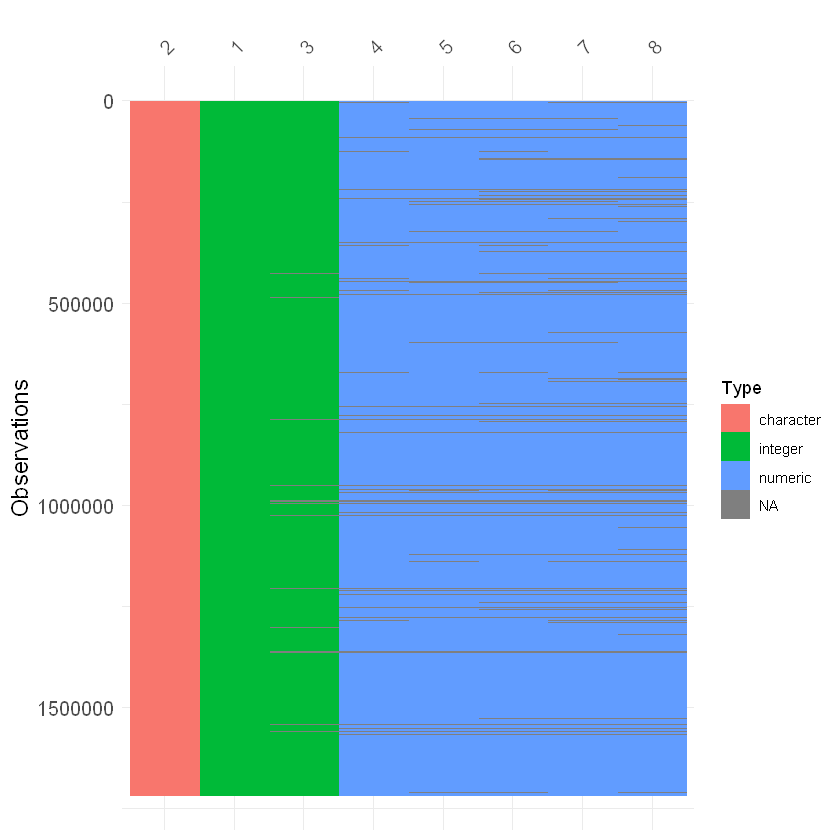

In [ ]:
# Chart to visualize missing precipitation data with column numbers as labels
col_numbers <- seq_along(colnames(precipitation_data))
colnames(precipitation_data) <- as.character(col_numbers)
vis_dat(
  precipitation_data, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16, face = "bold")
  )


**Correspondence between column number and variable name for `precipitation_data`:**

| Column Number | Variable Name |
|---------------|---------------|
| 1             | `ID.OMM.station` |
| 2             | `Date`           |
| 3             | `Humidité` |
| 4             | `Précipitations.dans.la.dernière.heure` |
| 5             | `Précipitations.dans.la.dernière.3.heures` |
| 6             | `Précipitations.dans.la.dernière.6.heures` |
| 7             | `Précipitations.dans.la.dernière.12.heures` |
| 8             | `Précipitations.dans.la.dernière.24.heures` |


In [11]:
# Getting all the different stations
stations <- unique(temperature_data$ID.OMM.station)
stations


NULL

### 3. SELECTED DATASET - ESSENTIAL METEOROLOGICAL VARIABLES

In this section, we create a dataset with only the most important meteorological variables for analysis.


In [16]:
# Creation of the selected dataset with essential variables
selected_weather_data <- data_weather[, c(1, 2, 3, 6, 7, 8, 15, 32, 39, 60, 61, 71, 72, 73, 82)]

# Sort by ascending date
selected_weather_data <- selected_weather_data[order(selected_weather_data$Date), ]

# Reorganize the index
rownames(selected_weather_data) <- NULL

# Display first rows
head(selected_weather_data)
dim(selected_weather_data)


,ID.OMM.station,Date,Pression.au.niveau.mer,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Nebulosité.totale,Rafale.sur.les.10.dernières.minutes,Précipitations.dans.la.dernière.heure,Coordonnees,Nom,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
1,7790,2015-08-04T02:00:00+02:00,101570,260,1.5,294.85,NA,NA,0.0,"42.540667, 9.485167",BASTIA,42.540667,9.485167,10,8
2,7761,2015-08-04T02:00:00+02:00,101600,70,2.7,295.15,NA,NA,0.0,"41.918, 8.792667",AJACCIO,41.918000,8.792667,5,8
3,7020,2015-08-04T02:00:00+02:00,101390,240,6.5,288.85,10,8.1,0.0,"49.725167, -1.939833",PTE DE LA HAGUE,49.725167,-1.939833,6,8
4,7240,2015-08-04T02:00:00+02:00,101410,270,3.1,292.85,90,5.1,-0.1,"47.4445, 0.727333",TOURS,47.444500,0.727333,108,8
5,81415,2015-08-04T02:00:00+02:00,101370,220,1.5,297.55,NA,3.0,0.2,"3.640167, -54.028333",MARIPASOULA,3.640167,-54.028333,106,8
6,7110,2015-08-04T02:00:00+02:00,101490,240,3.0,286.35,10,4.5,0.0,"48.444167, -4.412",BREST-GUIPAVAS,48.444167,-4.412000,94,8


[1] 1719567      15

**Correspondence between column number and variable name for `selected_weather_data`:**

| Number | Variable Name | Description |
|--------|---------------|-------------|
| 1 | `ID.OMM.station` | Station identifier |
| 2 | `Date` | Observation date/time |
| 3 | `Pression.au.niveau.mer` | Pressure (main reference) |
| 4 | `Direction.du.vent.moyen.10.mn` | Wind direction |
| 5 | `Vitesse.du.vent.moyen.10.mn` | Wind speed |
| 6 | `Température` | Air temperature |
| 7 | `Point.de.rosée` | Humidity via dew point |
| 8 | `Humidité` | Relative humidity |
| 13 | `Précipitations.dans.la.dernière.heure` | Precipitation |
| 14 | `Coordonnees` | Grouped coordinates |
| 15 | `Nom` | Station name |
| 16 | `Latitude` | Latitude |
| 17 | `Longitude` | Longitude |
| 18 | `Altitude` | Altitude |
| 19 | `mois_de_l_annee` | Month (useful for seasonal grouping) |


### 4. MISSING DATA ANALYSIS - SELECTED DATASET

Visualization of missing data for the selected dataset with essential meteorological variables.


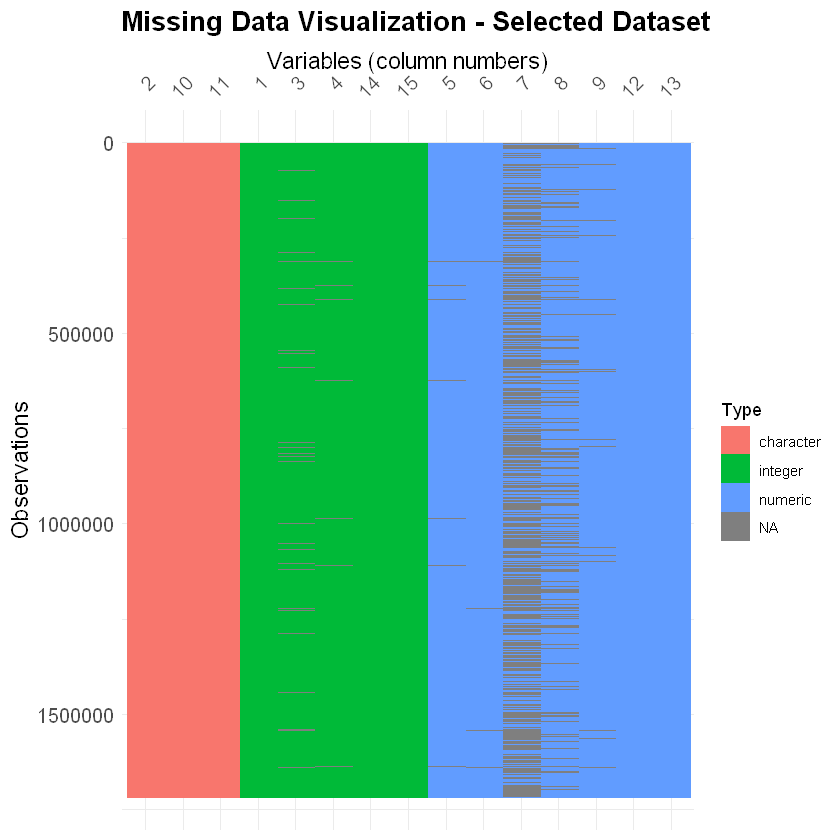

In [17]:
# Create a copy with column numbers for display
selected_data_display <- selected_weather_data
col_numbers <- seq_along(colnames(selected_data_display))
colnames(selected_data_display) <- as.character(col_numbers)

# Missing data visualization
vis_dat(
  selected_data_display, 
  warn_large_data = FALSE
) +
  ggplot2::theme(
    axis.text.x = ggplot2::element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = ggplot2::element_text(size = 12),
    axis.title = ggplot2::element_text(size = 14),
    plot.title = ggplot2::element_text(size = 16)
  ) +
  ggplot2::labs(
    title = "Missing Data Visualization - Selected Dataset",
    x = "Variables (column numbers)",
    y = "Observations"
  )


In [20]:
# Quantitative analysis of missing data
missing_count <- sapply(selected_weather_data, function(x) sum(is.na(x)))
missing_percentage <- round(missing_count / nrow(selected_weather_data) * 100, 2)

missing_data_summary <- data.frame(
  Variable = colnames(selected_weather_data),
  Missing_Count = missing_count,
  Missing_Percentage = missing_percentage
)

# Sort by missing data percentage in descending order
missing_data_summary <- missing_data_summary[order(missing_data_summary$Missing_Percentage, decreasing = TRUE), ]

cat("Missing data summary by variable:\n")
print(missing_data_summary)


Missing data summary by variable:
                                                                   Variable
Nebulosité.totale                                         Nebulosité.totale
Rafale.sur.les.10.dernières.minutes     Rafale.sur.les.10.dernières.minutes
Pression.au.niveau.mer                               Pression.au.niveau.mer
Précipitations.dans.la.dernière.heure Précipitations.dans.la.dernière.heure
Température                                                     Température
Direction.du.vent.moyen.10.mn                 Direction.du.vent.moyen.10.mn
Vitesse.du.vent.moyen.10.mn                     Vitesse.du.vent.moyen.10.mn
ID.OMM.station                                               ID.OMM.station
Date                                                                   Date
Coordonnees                                                     Coordonnees
Nom                                                                     Nom
Latitude                                              

### 5. FINAL DATASET - REMOVING HIGH MISSING DATA VARIABLES

Creation of a final dataset by removing variables with high percentages of missing data to improve data quality for analysis.


In [21]:
# Create final dataset by removing variables with high missing data percentages
# Removing: Nebulosité.totale (58.12% missing) and Rafale.sur.les.10.dernières.minutes (21.43% missing)

final_weather_data <- selected_weather_data[, !names(selected_weather_data) %in% 
                                           c("Nebulosité.totale", "Rafale.sur.les.10.dernières.minutes")]

# Display dimensions and first rows
cat("Final dataset dimensions:", dim(final_weather_data)[1], "observations and", dim(final_weather_data)[2], "variables\n")
head(final_weather_data)


Final dataset dimensions: 1719567 observations and 13 variables


,ID.OMM.station,Date,Pression.au.niveau.mer,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Précipitations.dans.la.dernière.heure,Coordonnees,Nom,Latitude,Longitude,Altitude,mois_de_l_annee
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
1,7790,2015-08-04T02:00:00+02:00,101570,260,1.5,294.85,0.0,"42.540667, 9.485167",BASTIA,42.540667,9.485167,10,8
2,7761,2015-08-04T02:00:00+02:00,101600,70,2.7,295.15,0.0,"41.918, 8.792667",AJACCIO,41.918000,8.792667,5,8
3,7020,2015-08-04T02:00:00+02:00,101390,240,6.5,288.85,0.0,"49.725167, -1.939833",PTE DE LA HAGUE,49.725167,-1.939833,6,8
4,7240,2015-08-04T02:00:00+02:00,101410,270,3.1,292.85,-0.1,"47.4445, 0.727333",TOURS,47.444500,0.727333,108,8
5,81415,2015-08-04T02:00:00+02:00,101370,220,1.5,297.55,0.2,"3.640167, -54.028333",MARIPASOULA,3.640167,-54.028333,106,8
6,7110,2015-08-04T02:00:00+02:00,101490,240,3.0,286.35,0.0,"48.444167, -4.412",BREST-GUIPAVAS,48.444167,-4.412000,94,8


**Variables removed from the final dataset:**

- `Nebulosité.totale` (Cloud cover) - 58.12% missing data
- `Rafale.sur.les.10.dernières.minutes` (Gusts) - 21.43% missing data

**Final dataset variables (17 variables):**

| Number | Variable Name | Description |
|--------|---------------|-------------|
| 1 | `ID.OMM.station` | Station identifier |
| 2 | `Date` | Observation date/time |
| 3 | `Pression.au.niveau.mer` | Pressure (main reference) |
| 4 | `Direction.du.vent.moyen.10.mn` | Wind direction |
| 5 | `Vitesse.du.vent.moyen.10.mn` | Wind speed |
| 6 | `Température` | Air temperature |
| 7 | `Point.de.rosée` | Humidity via dew point |
| 8 | `Humidité` | Relative humidity |
| 9 | `Visibilité.horizontale` | Visibility |
| 10 | `Temps.présent` | Observed weather |
| 11 | `Précipitations.dans.la.dernière.heure` | Precipitation |
| 12 | `Coordonnees` | Grouped coordinates |
| 13 | `Nom` | Station name |
| 14 | `Latitude` | Latitude |
| 15 | `Longitude` | Longitude |
| 16 | `Altitude` | Altitude |
| 17 | `mois_de_l_annee` | Month (useful for seasonal grouping) |


In [24]:
# Missing data analysis for the final dataset
final_missing_data_summary <- data.frame(
  Variable = colnames(final_weather_data),
  Missing_Count = sapply(final_weather_data, function(x) sum(is.na(x))),
  Missing_Percentage = round(sapply(final_weather_data, function(x) sum(is.na(x))/length(x)*100), 2)
)

# Trier par pourcentage de données manquantes (ordre décroissant)
final_missing_data_summary <- final_missing_data_summary[order(final_missing_data_summary$Missing_Percentage, decreasing = TRUE), ]

cat("Final dataset missing data summary:\n")
print(final_missing_data_summary)


Final dataset missing data summary:
                                                                   Variable
Pression.au.niveau.mer                               Pression.au.niveau.mer
Précipitations.dans.la.dernière.heure Précipitations.dans.la.dernière.heure
Température                                                     Température
Direction.du.vent.moyen.10.mn                 Direction.du.vent.moyen.10.mn
Vitesse.du.vent.moyen.10.mn                     Vitesse.du.vent.moyen.10.mn
ID.OMM.station                                               ID.OMM.station
Date                                                                   Date
Coordonnees                                                     Coordonnees
Nom                                                                     Nom
Latitude                                                           Latitude
Longitude                                                         Longitude
Altitude                                            

### 6. CLEAN DATASET - REMOVING ROWS WITH MISSING VALUES

Creation of a clean dataset by removing all rows that contain any missing values (NaN/NA).


In [25]:
# Create clean dataset by removing rows with any missing values
cat("Original final dataset dimensions:", dim(final_weather_data)[1], "observations and", dim(final_weather_data)[2], "variables\n")

# Count rows with missing values before removal
rows_with_na <- sum(!complete.cases(final_weather_data))
cat("Number of rows with missing values:", rows_with_na, "\n")
cat("Percentage of rows with missing values:", round(rows_with_na/nrow(final_weather_data)*100, 2), "%\n")

# Remove rows with any missing values
clean_weather_data <- final_weather_data[complete.cases(final_weather_data), ]

# Reorganize the index
rownames(clean_weather_data) <- NULL

# Display new dimensions
cat("Clean dataset dimensions:", dim(clean_weather_data)[1], "observations and", dim(clean_weather_data)[2], "variables\n")
cat("Rows removed:", nrow(final_weather_data) - nrow(clean_weather_data), "\n")
cat("Data retention rate:", round(nrow(clean_weather_data)/nrow(final_weather_data)*100, 2), "%\n")


Original final dataset dimensions: 1719567 observations and 13 variables
Number of rows with missing values: 168753 
Percentage of rows with missing values: 9.81 %
Clean dataset dimensions: 1550814 observations and 13 variables
Rows removed: 168753 
Data retention rate: 90.19 %


In [26]:
# 7. DATA PRESENTATION - NUMERICAL AND GRAPHICAL SUMMARIES

# Basic numerical summary
summary(clean_weather_data)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1550814     Min.   : 94520        
 1st Qu.: 7190   Class :character   1st Qu.:101210        
 Median : 7558   Mode  :character   Median :101610        
 Mean   :24848                      Mean   :101627        
 3rd Qu.:61972                      3rd Qu.:102100        
 Max.   :81415                      Max.   :104960        
 Direction.du.vent.moyen.10.mn Vitesse.du.vent.moyen.10.mn  Température   
 Min.   :  0.0                 Min.   : 0.000              Min.   :247.2  
 1st Qu.: 90.0                 1st Qu.: 1.900              1st Qu.:282.4  
 Median :180.0                 Median : 3.400              Median :288.4  
 Mean   :176.7                 Mean   : 4.074              Mean   :289.0  
 3rd Qu.:270.0                 3rd Qu.: 5.500              3rd Qu.:296.8  
 Max.   :360.0                 Max.   :47.200              Max.   :332.9  
 Précipitations.dans.la.dernière.heure Coordonnees            

In [ ]:
# Key statistics for numerical variables
library(dplyr)

# Temperature analysis
temp_stats <- clean_weather_data %>%
  summarise(
    mean_temp = mean(Température, na.rm = TRUE),
    median_temp = median(Température, na.rm = TRUE),
    min_temp = min(Température, na.rm = TRUE),
    max_temp = max(Température, na.rm = TRUE),
    sd_temp = sd(Température, na.rm = TRUE)
  )
print("Temperature Statistics:")
print(temp_stats)



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




[1] "Temperature Statistics:"
  mean_temp median_temp min_temp max_temp  sd_temp
1  289.0342      288.45   247.25   332.85 8.673134


In [30]:
# Pressure and wind statistics
pressure_wind_stats <- clean_weather_data %>%
  summarise(
    mean_pressure = mean(Pression.au.niveau.mer, na.rm = TRUE),
    mean_wind_speed = mean(Vitesse.du.vent.moyen.10.mn, na.rm = TRUE),
    max_wind_speed = max(Vitesse.du.vent.moyen.10.mn, na.rm = TRUE),
  )
print("Pressure and Wind Statistics:")
print(pressure_wind_stats)


[1] "Pressure and Wind Statistics:"
  mean_pressure mean_wind_speed max_wind_speed
1      101627.5        4.073789           47.2


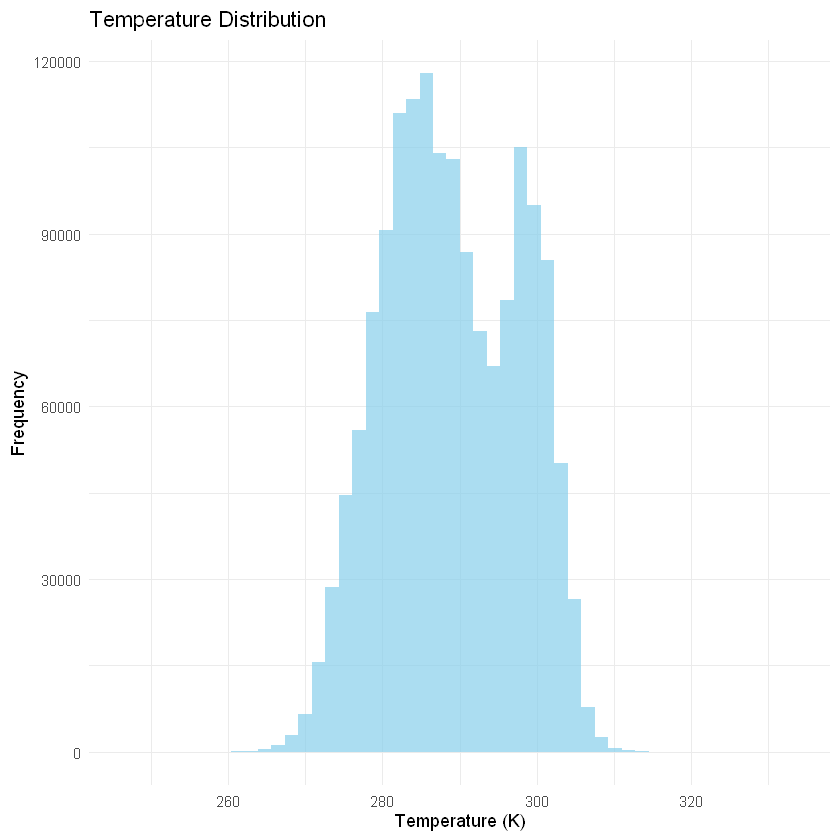

In [38]:
# Graphical summaries - Temperature distribution
library(ggplot2)

ggplot(clean_weather_data, aes(x = Température)) +
geom_histogram(bins = 50, fill = "skyblue", alpha = 0.7) +
labs(title = "Temperature Distribution", 
     x = "Temperature (K)", 
     y = "Frequency") +
theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


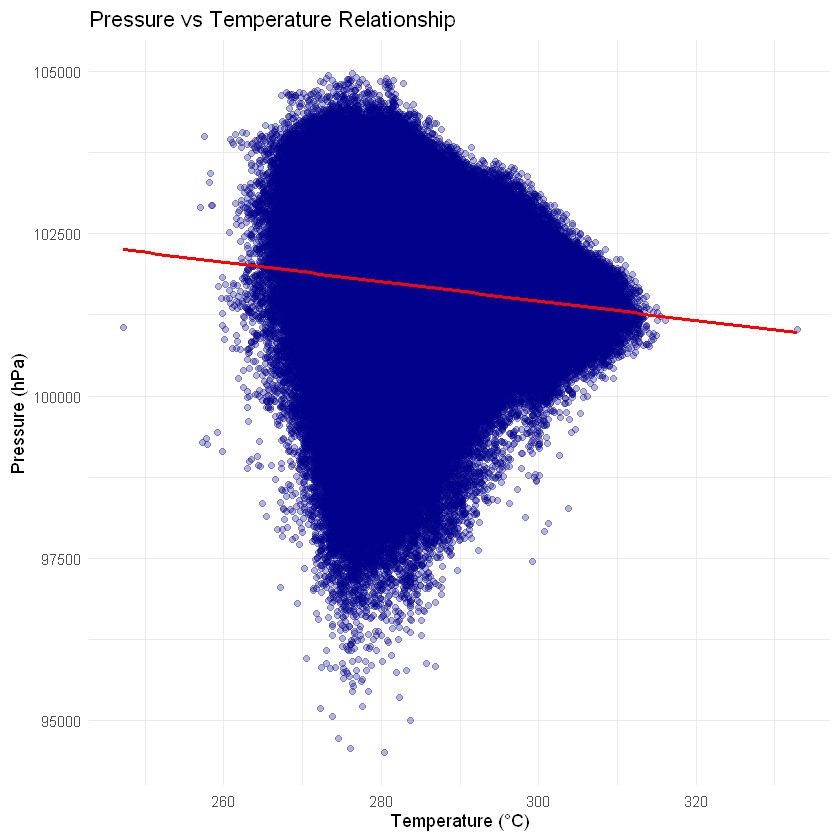

In [ ]:
# Pressure vs Temperature scatter plot
ggplot(clean_weather_data, aes(x = Température, y = Pression.au.niveau.mer)) +
  geom_point(alpha = 0.3, color = "darkblue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Pressure vs Temperature Relationship",
       x = "Temperature (°C)",
       y = "Pressure (hPa)") +
  theme_minimal()


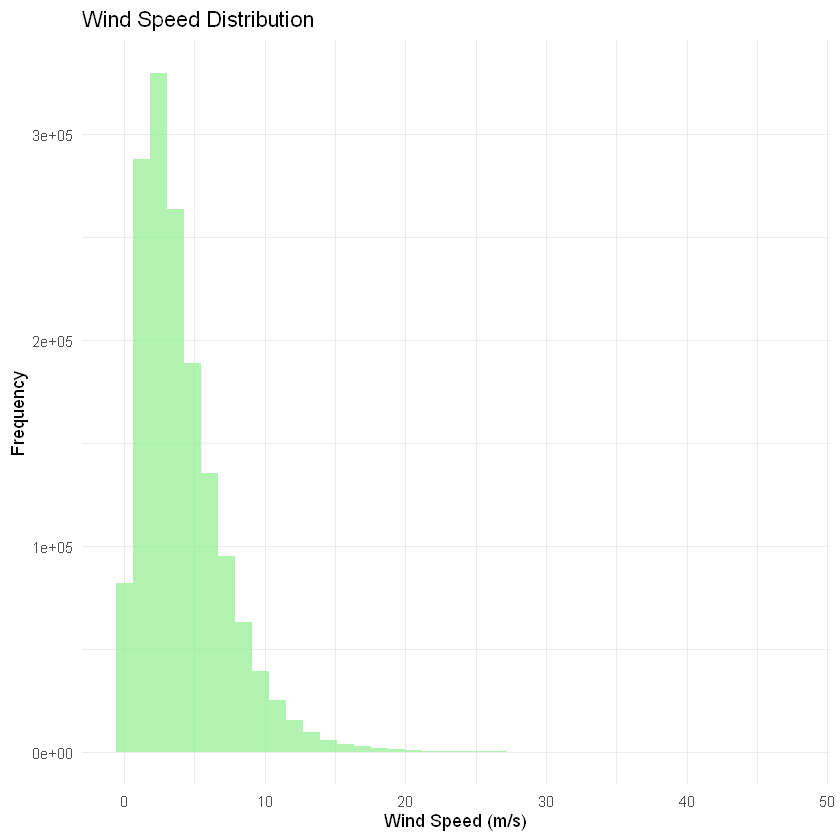

In [ ]:
# Wind speed distribution
ggplot(clean_weather_data, aes(x = Vitesse.du.vent.moyen.10.mn)) +
  geom_histogram(bins = 40, fill = "lightgreen", alpha = 0.7) +
  labs(title = "Wind Speed Distribution",
       x = "Wind Speed (m/s)",
       y = "Frequency") +
  theme_minimal()
